In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [34]:
df= pd.read_csv('/content/drive/MyDrive/dataset/electricity_usage_data_seasonal.csv')
df['Month'] = pd.to_datetime(df['Month'], format='%B').dt.month
print(df.head())




   Fan  Monitor  AirConditioner  Television  Refrigerator  Month       City  \
0    2        0               0           0             1     12  Ahmedabad   
1    4        1               0           0             1      4  Bangalore   
2    2        2               1           1             1     11  Bangalore   
3    1        1               0           0             2      4  Hyderabad   
4    1        2               1           2             1      3    Kolkata   

   num_rooms  num_people  housearea  is_ac  is_tv  is_flat  \
0          3           1       4505      1      0        0   
1          1           6       2587      1      1        1   
2          5           6       1101      1      0        1   
3          2           3       2846      1      1        1   
4          5           3       2297      1      0        0   

   ave_monthly_income  num_children  is_urban  units_per_day  units_per_month  \
0              169364             4         1      22.049982       529.

In [35]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45835 entries, 0 to 45834
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fan                  45835 non-null  int64  
 1   Monitor              45835 non-null  int64  
 2   AirConditioner       45835 non-null  int64  
 3   Television           45835 non-null  int64  
 4   Refrigerator         45835 non-null  int64  
 5   Month                45835 non-null  int32  
 6   City                 45835 non-null  object 
 7   num_rooms            45835 non-null  int64  
 8   num_people           45835 non-null  int64  
 9   housearea            45835 non-null  int64  
 10  is_ac                45835 non-null  int64  
 11  is_tv                45835 non-null  int64  
 12  is_flat              45835 non-null  int64  
 13  ave_monthly_income   45835 non-null  int64  
 14  num_children         45835 non-null  int64  
 15  is_urban             45835 non-null 

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fan,45835.0,2.492680,1.118403,1.000000,1.000000,2.000000,3.000000,4.000000
Monitor,45835.0,1.000305,0.816737,0.000000,0.000000,1.000000,2.000000,2.000000
AirConditioner,45835.0,0.498527,0.500003,0.000000,0.000000,0.000000,1.000000,1.000000
Television,45835.0,0.998800,0.818324,0.000000,0.000000,1.000000,2.000000,2.000000
Refrigerator,45835.0,1.497196,0.499998,1.000000,1.000000,1.000000,2.000000,2.000000
Month,45835.0,6.473961,3.461322,1.000000,3.000000,6.000000,9.000000,12.000000
num_rooms,45835.0,2.999324,1.412214,1.000000,2.000000,3.000000,4.000000,5.000000
num_people,45835.0,3.989026,1.999844,1.000000,2.000000,4.000000,6.000000,7.000000
housearea,45835.0,2745.114192,1301.564390,500.000000,1609.000000,2749.000000,3872.000000,4999.000000
is_ac,45835.0,0.502542,0.499999,0.000000,0.000000,1.000000,1.000000,1.000000


In [37]:
df.isnull().sum()

,0
Fan,0
Monitor,0
AirConditioner,0
Television,0
Refrigerator,0
Month,0
City,0
num_rooms,0
num_people,0
housearea,0


<Axes: xlabel='ElectricityBill_INR', ylabel='Density'>

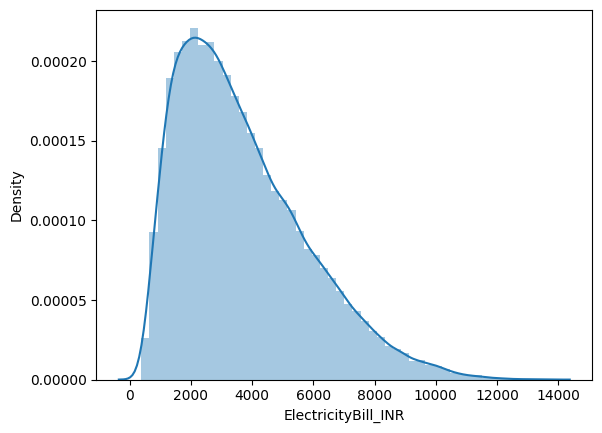

In [38]:
sns.distplot(df['ElectricityBill_INR'])

In [39]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
LE=LabelEncoder()

In [40]:
df['City']=LE.fit_transform(df['City'])

df['Monitor']=LE.fit_transform(df['Monitor'])
df['Refrigerator']=LE.fit_transform(df['Refrigerator'])

In [41]:
std_scale=StandardScaler()
std_scale

StandardScaler()

In [61]:
df['Fan']=std_scale.fit_transform(df[['Fan']])
df['Television']=std_scale.fit_transform(df[['Television']])
df['units_per_month']=std_scale.fit_transform(df[['units_per_month']])
df['Total Appliances']=std_scale.fit_transform(df[['Total Appliances']])
df['Electricity Cost per Unit']=std_scale.fit_transform(df[['Electricity Cost per Unit']])

In [62]:
df['Total Appliances'] = df[['Fan', 'Monitor', 'AirConditioner', 'Television', 'Refrigerator']].sum(axis=1)

In [63]:
df.head()

,Fan,Monitor,AirConditioner,Television,Refrigerator,Month,City,num_rooms,num_people,housearea,...,is_flat,ave_monthly_income,num_children,is_urban,units_per_day,units_per_month,rate_per_unit,ElectricityBill_INR,Electricity Cost per Unit,Total Appliances
0,-0.440526,0,0,-1.220557,0,12,0,3,1,4505,...,0,169364,4,1,22.049982,-0.020203,0.254908,3951.549824,0.254908,-1.661083
1,1.347758,1,0,-1.220557,0,4,1,1,6,2587,...,1,160455,0,1,18.864355,0.605397,-0.227600,4350.718002,-0.227600,1.127201
2,-0.440526,2,1,0.001466,0,11,1,5,6,1101,...,1,132704,4,0,19.649636,-0.260601,-0.968630,2253.066877,-0.968630,2.560940
3,-1.334668,1,0,-1.220557,1,4,4,2,3,2846,...,1,24217,3,1,18.196717,0.505100,0.479094,5214.328435,0.479094,-0.555225
4,-1.334668,2,1,1.223489,0,3,5,5,3,2297,...,0,26618,3,0,28.865578,1.385118,0.529223,6988.356738,0.529223,2.888821


<Axes: xlabel='Total Appliances', ylabel='ElectricityBill_INR'>

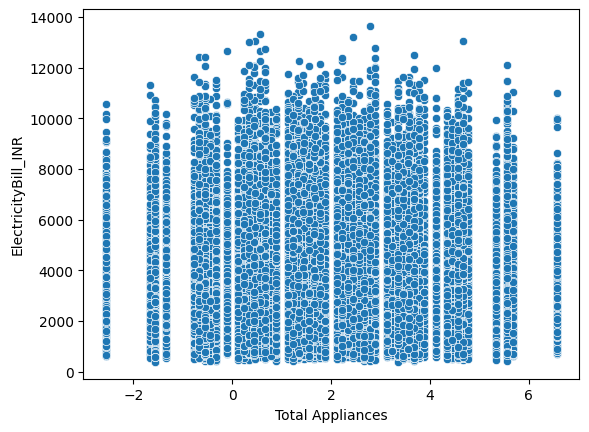

In [64]:
sns.scatterplot(x='Total Appliances',y='ElectricityBill_INR',data=df)

In [65]:
df['Electricity Cost per Unit'] = df['ElectricityBill_INR'] / df['units_per_month']

<Axes: xlabel='units_per_month', ylabel='ElectricityBill_INR'>

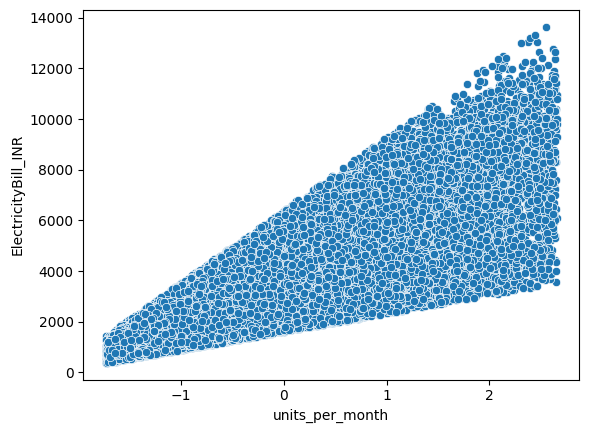

In [66]:
sns.scatterplot(x='units_per_month',y='ElectricityBill_INR',data=df)

In [67]:
df['Total Appliances'] = df[['Fan', 'Monitor', 'AirConditioner', 'Television', 'Refrigerator']].sum(axis=1)

In [68]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
LE=LabelEncoder()

In [69]:
df['City']=LE.fit_transform(df['City'])

df['Monitor']=LE.fit_transform(df['Monitor'])
df['Refrigerator']=LE.fit_transform(df['Refrigerator'])

In [70]:
std_scale=StandardScaler()
std_scale

StandardScaler()

In [71]:
df['Fan']=std_scale.fit_transform(df[['Fan']])
df['Television']=std_scale.fit_transform(df[['Television']])
df['units_per_month']=std_scale.fit_transform(df[['units_per_month']])
df['Total Appliances']=std_scale.fit_transform(df[['Total Appliances']])
df['rate_per_unit']=std_scale.fit_transform(df[['rate_per_unit']])

In [72]:
df.head()

,Fan,Monitor,AirConditioner,Television,Refrigerator,Month,City,num_rooms,num_people,housearea,...,is_flat,ave_monthly_income,num_children,is_urban,units_per_day,units_per_month,rate_per_unit,ElectricityBill_INR,Electricity Cost per Unit,Total Appliances
0,-0.440526,0,0,-1.220557,0,12,0,3,1,4505,...,0,169364,4,1,22.049982,-0.020203,0.254908,3951.549824,-195591.890946,-2.052041
1,1.347758,1,0,-1.220557,0,4,1,1,6,2587,...,1,160455,0,1,18.864355,0.605397,-0.227600,4350.718002,7186.557129,-0.487508
2,-0.440526,2,1,0.001466,0,11,1,5,6,1101,...,1,132704,4,0,19.649636,-0.260601,-0.968630,2253.066877,-8645.665790,0.316977
3,-1.334668,1,0,-1.220557,1,4,4,2,3,2846,...,1,24217,3,1,18.196717,0.505100,0.479094,5214.328435,10323.366929,-1.431533
4,-1.334668,2,1,1.223489,0,3,5,5,3,2297,...,0,26618,3,0,28.865578,1.385118,0.529223,6988.356738,5045.314543,0.500954


In [73]:
x=df.drop(['ElectricityBill_INR'],axis=1)
y=df[['ElectricityBill_INR']]

In [74]:
x.head()

,Fan,Monitor,AirConditioner,Television,Refrigerator,Month,City,num_rooms,num_people,housearea,...,is_tv,is_flat,ave_monthly_income,num_children,is_urban,units_per_day,units_per_month,rate_per_unit,Electricity Cost per Unit,Total Appliances
0,-0.440526,0,0,-1.220557,0,12,0,3,1,4505,...,0,0,169364,4,1,22.049982,-0.020203,0.254908,-195591.890946,-2.052041
1,1.347758,1,0,-1.220557,0,4,1,1,6,2587,...,1,1,160455,0,1,18.864355,0.605397,-0.227600,7186.557129,-0.487508
2,-0.440526,2,1,0.001466,0,11,1,5,6,1101,...,0,1,132704,4,0,19.649636,-0.260601,-0.968630,-8645.665790,0.316977
3,-1.334668,1,0,-1.220557,1,4,4,2,3,2846,...,1,1,24217,3,1,18.196717,0.505100,0.479094,10323.366929,-1.431533
4,-1.334668,2,1,1.223489,0,3,5,5,3,2297,...,0,0,26618,3,0,28.865578,1.385118,0.529223,5045.314543,0.500954


In [75]:
y.head()

,ElectricityBill_INR
0,3951.549824
1,4350.718002
2,2253.066877
3,5214.328435
4,6988.356738


In [76]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

x_train.shape



(32084, 21)

In [77]:
y_train.shape

(32084, 1)

In [78]:
x_test.shape

(13751, 21)

In [79]:
y_test.shape

(13751, 1)

**Linear Regression**

In [80]:
from sklearn.linear_model import LinearRegression

regression_model=LinearRegression()

regression_model.fit(x_train,y_train)



LinearRegression()

In [81]:
regression_model.coef_[0]

array([ 1.15959140e+00, -4.99712338e+00, -1.66417461e+00,  1.59211061e-01,
       -2.53469487e+00,  1.30655016e-01,  6.10451506e-02,  1.34859139e+00,
        1.71209487e+00,  4.68146829e-04, -3.35674703e+00, -2.62369080e+00,
        1.15451339e+01,  8.74688334e-05, -1.21807503e-01,  3.58129536e+00,
       -1.06707169e+00,  1.66310051e+03,  1.17357834e+03,  1.22446701e-06,
       -4.41996799e+00])

In [82]:
for idx,col_name in enumerate(x_train.columns):
    print('The coeff for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coeff for Fan is 1.1595913989970583
The coeff for Monitor is -4.99712337510199
The coeff for AirConditioner is -1.664174606983188
The coeff for Television is 0.15921106091435172
The coeff for Refrigerator is -2.534694869580721
The coeff for Month is 0.1306550158579205
The coeff for City is 0.061045150597446
The coeff for num_rooms is 1.3485913870184991
The coeff for num_people is 1.7120948667906772
The coeff for housearea is 0.00046814682851947456
The coeff for is_ac is -3.3567470307789273
The coeff for is_tv is -2.6236908035034476
The coeff for is_flat is 11.54513385525497
The coeff for ave_monthly_income is 8.746883336456827e-05
The coeff for num_children is -0.12180750348732985
The coeff for is_urban is 3.581295355739142
The coeff for units_per_day is -1.067071688112325
The coeff for units_per_month is 1663.1005052647495
The coeff for rate_per_unit is 1173.5783421716103
The coeff for Electricity Cost per Unit is 1.2244670122285584e-06
The coeff for Total Appliances is -4.4199679

In [83]:
intercept=regression_model.intercept_[0]
intercept

3687.796872987685

In [84]:
# R Square on the train the data
regression_model.score(x_train,y_train)

0.9372736570090999

In [85]:
# R Square on the test the data
regression_model.score(x_test,y_test)

0.9375167032015563

In [86]:
predicted_train=regression_model.predict(x_train)
predicted_test=regression_model.predict(x_test)

y_train.head()



,ElectricityBill_INR
36409,2474.583185
44607,5140.466389
9428,3808.363791
41026,5655.328383
2046,8349.137985


In [87]:
predicted_train

array([[2820.53890397],
       [5025.38240284],
       [3933.17662006],
       ...,
       [ 157.97913493],
       [2723.65579939],
       [ 694.36268389]])

In [88]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

# MSE on train data
MSE_Train=mean_squared_error(y_train,predicted_train)
MSE_Train



275278.1161275899

In [89]:
# RMSE on train data
RMSE_Train=np.sqrt(mean_squared_error(y_train,predicted_train))
RMSE_Train

524.669530397554

In [90]:
mean_absolute_percentage_error(y_train,predicted_train)

0.17197412600085468

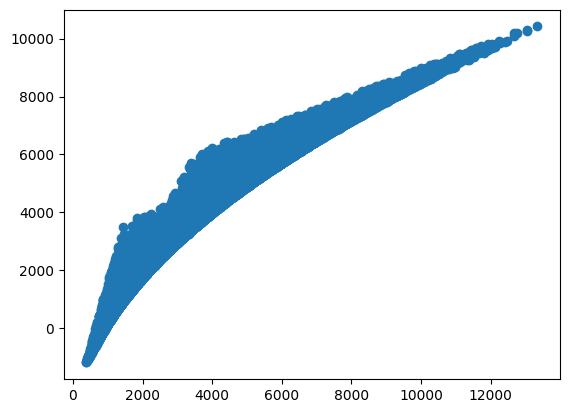

In [91]:
plt.scatter(y_train,predicted_train);

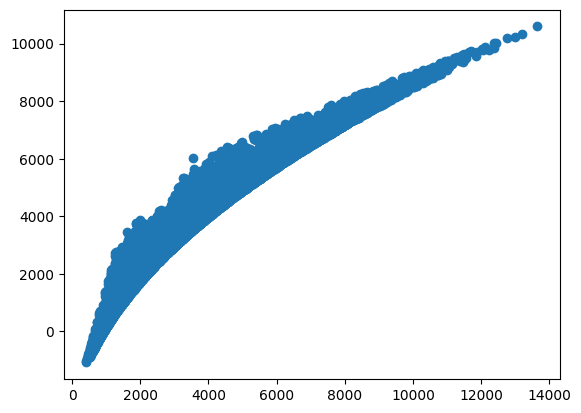

In [92]:
plt.scatter(y_test,predicted_test);

**DECISION TREE**

In [96]:
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor(max_depth=3)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [97]:
DecisionTreeRegressor(max_depth=3)
dt_model.score(x_train,y_train)

0.846513933741657

In [98]:
dt_model.score(x_test,y_test)

0.8438734362798201

In [99]:
## RMSE on train data
predicted_train=dt_model.predict(x_train)
mean_squared_error(y_train,predicted_train,squared=False)

820.7206056746437

In [100]:
## RMSE on test data
predicted_test=dt_model.predict(x_test)
mean_squared_error(y_test,predicted_test,squared=False)

833.0390649154102

In [101]:
mean_absolute_percentage_error(y_train,predicted_train)

0.2286874620713831

**RANDOM FOREST**

In [102]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor(n_estimators=100,
                              random_state=4,
                              max_samples=0.7,
                              max_features=0.75,
                              max_depth=35)

rf_model.fit(x_train,y_train)



RandomForestRegressor(max_depth=35, max_features=0.75, max_samples=0.7,
                      random_state=4)

In [103]:
rf_model.score(x_train,y_train)

0.9999587984748608

In [104]:
rf_model.score(x_test,y_test)

0.9998392365826352

In [105]:
## RMSE on train data
predicted_train=rf_model.predict(x_train)
mean_squared_error(y_train,predicted_train,squared=False)

13.446755422262015

In [106]:
## RMSE on test data
predicted_test=rf_model.predict(x_test)
mean_squared_error(y_test,predicted_test,squared=False)

26.731330904587153

In [107]:
mean_absolute_percentage_error(y_train,predicted_train)

0.0018359392243954705

In [110]:
Results = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest'],'Train Score':[0.99,0.85,0.99],'Test Score':[0.99,0.85,0.99],'RMSE Score':[1282,802,13],'MAE Score':[0.170,0.207,0.002]})
Results_show = Results.set_index('Model')
Results_show

,Train Score,Test Score,RMSE Score,MAE Score
Model,,,,
Linear Regression,0.99,0.99,1282,0.170
Decision Tree,0.85,0.85,802,0.207
Random Forest,0.99,0.99,13,0.002
